In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus']=False

# 샘플데이터

In [5]:
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


# 1. 연도별 승객수의 변화

## matplotlib으로 시각화

### 데이터 가공

In [10]:
flights_year = flights.groupby('year')['passengers'].sum() # 그룹화
flights_year

year
1949    1520
1950    1676
1951    2042
1952    2364
1953    2700
1954    2867
1955    3408
1956    3939
1957    4421
1958    4572
1959    5140
1960    5714
Name: passengers, dtype: int64

### matplotlib으로 시각화

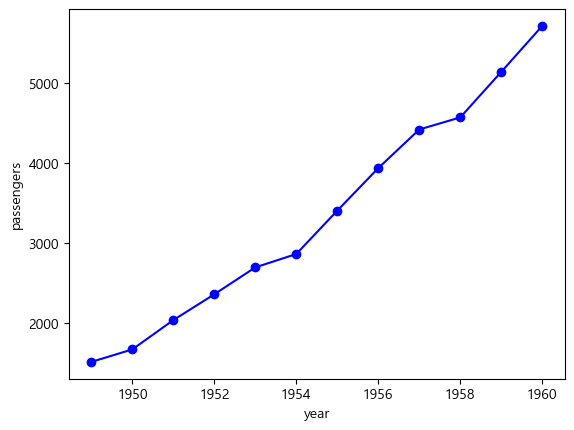

In [13]:
plt.plot(flights_year, 'bo-')
plt.xlabel('year')
plt.ylabel('passengers')
plt.show()

## seaborn
* `sns.lineplot(data=데이터프레임, x=x축컬럼, y=y축컬럼, estimator=통계함수)`<br>
estimator를 생략하면 평균으로 통계를 적용함

<Axes: xlabel='year', ylabel='passengers'>

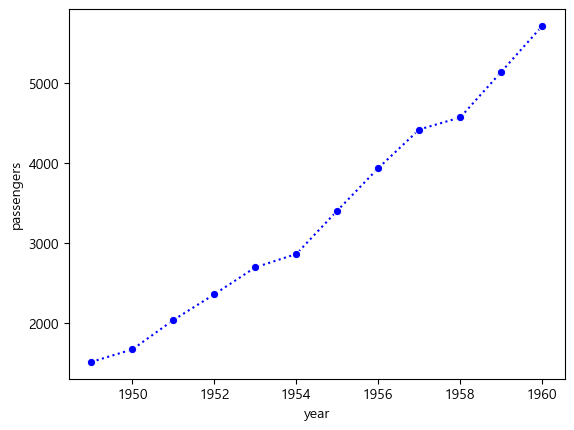

In [19]:
sns.lineplot(flights, x= 'year' ,y= 'passengers', estimator = sum,errorbar = None,
            color='b', marker='o', ls=':')

# 2. 연도-월별 승객수의 변화

## matplotlib으로 시각화

### 데이터 가공

In [20]:
flights_pivot = flights.pivot(index='year',columns='month',values='passengers')
flights_pivot

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


### 시각화

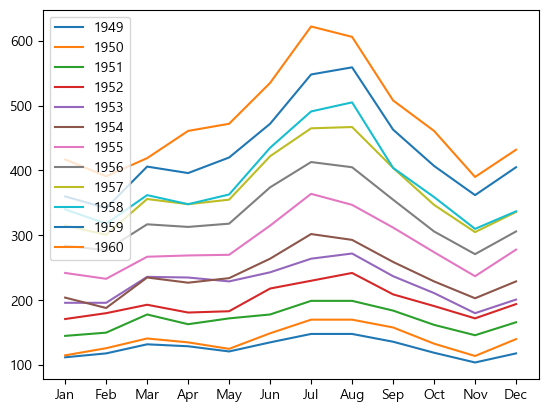

In [26]:
for i in range(12):
    plt.plot(flights_pivot.iloc[i], label = flights_pivot.index[i])

plt.legend()
plt.show()
    

## seaborn으로 시각화

<Axes: xlabel='month', ylabel='passengers'>

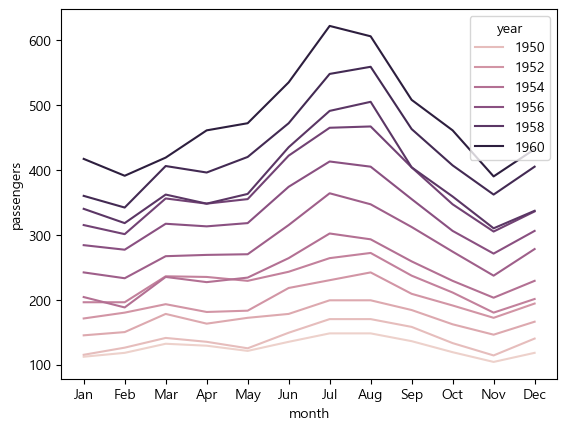

In [27]:
sns.lineplot(flights,x='month',y='passengers',errorbar = None, hue= 'year')